# Primer Examen 15%

A) Cargando el archivo JSON: 
* https://github.com/restrepo/anomaly/raw/main/solutions.json.gz

en Pandas

1) Adicione una columna nueva `'smax'` con el valor máximo en valor absoluto de la lista de enteros de la correspondiente entrada en la columna '`solution`'
2) Adicione dos columnas nuevas: `'sum_s'` (`sum_s³`) con el resultado de la suma (al cubo) de todos los números de la lista de enteros de la correspondiente entrada en la columna '`solution`'
3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize         # Función para hallar raíces numéricas

In [2]:
aj = pd.read_json('https://github.com/restrepo/anomaly/raw/main/solutions.json.gz')
aj

,l,k,solution,gcd,n
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11
...,...,...,...,...,...
390069,"[-3, -15, -6]","[-3, 8, 9]","[8, -9, -9, 11, 25, -29, -29, 32]",36,8
390070,"[-10, -5, -15]","[-10, -12, 12]","[5, 5, 5, -17, -27, -27, 28, 28]",100,8
390071,"[15, -1, 15]","[-14, -13, -14]","[14, -15, -16, 17, -30, 31, 31, -32]",1,8
390072,"[-15, -9, -1]","[-13, -14, -12]","[11, -13, -15, 19, 23, -26, -30, 31]",18,8


In [10]:
fa = lambda x: max(map(abs, x))     # map(abs, x) -> valor absoluto a cada iterable de x

k = aj['solution'].apply(fa)
aj['smax'] = k
aj.head()

,l,k,solution,gcd,n,smax
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8


In [21]:
#segundo punto

aj['sum_s']=aj['solution'].apply(lambda x: sum(x))#suma
aj['sum_s**3']=aj['solution'].apply(lambda x: (sum(x))**3)#suma al cubo
aj.head()

,l,k,solution,gcd,n,smax,sum_s,sum_s**3
0,"[-1, 0, -1, 0, -1]","[-1, 0, -1, 1, -1]","[1, 4, 4, 4, -5, -5, -5, -5, -5, 6, 6]",1,11,6,0,0
1,"[-1, 1]","[-1, 0, -1]","[1, 2, 2, -3, -3, -3, 4]",1,7,4,0,0
2,"[1, -1, 0, 1, -1]","[-2, 0, -1, -2, 0]","[1, 1, -2, -2, -3, -3, 5, 5, 5, 5, -6, -6]",2,12,6,0,0
3,"[-1, 1, -1, 1, -1]","[-2, -1, 0, -1, 0]","[1, 1, 1, 1, 2, 2, 2, -3, -4, -4, -6, 7]",1,12,7,0,0
4,"[1, 0, 1, 0, -1]","[-2, -1, -2, -1, 0]","[1, 1, 1, -2, -2, -5, -5, 6, 6, 7, -8]",1,11,8,0,0


3) Usando como semilla el número de su cédula, genere un número entero de forma aleatoria entre 0 y 390073. Seleccione el la fila correspondiente a ese número entero y construya un polinomio con esos coeficientes. Encuentre las raices reales de ese polinomio y realice el correspondiente gráfico incluyendo: el polinomio generado, sus raices (como puntos en gráfico) y la derivada del polinomio. Optimize el rango de valores en el eje $x$ y en el eje $y$ del gráfico, de manera que el polinomio y sus raices se visualicen de la mejor forma posible. (Sugerencia → use: `plt.ylim(ymin,ymax)` ). Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo


In [29]:
#Punto tres
#generando un numero aleatorio

np.random.seed(1007694473)
num = np.random.randint(1,390073)
num

324742

In [40]:
k= aj.loc[num]                           #extrayendo del json la fila correspondiente al numero
coeficientes = k['solution']             # extrayendo la lista de coeficientes 
p = np.poly1d(coeficientes)               #generando un polinomio de numpy
p1=p.deriv()                             # derivada del polinomio

print('Polinomio:', p, '\n')

sp = p.r #soluciones del polinomio 

for i in range(len(sp)):
  print('Solución %d :' %(i+1), sp[i])

Polinomio:    9     8      7      6      5      4      3      2
1 x - 4 x - 16 x + 22 x + 25 x - 26 x + 27 x + 27 x - 28 x - 28 

Solución 1 : (5.963075807471785+0j)
Solución 2 : (-2.8230315758886193+0j)
Solución 3 : (1.6795086987623975+0j)
Solución 4 : (1+0j)
Solución 5 : (0.4335448448522061+1.0483014276274214j)
Solución 6 : (0.4335448448522061-1.0483014276274214j)
Solución 7 : (-1.3550152363044905+0j)
Solución 8 : (-0.665813691872735+0.35303142012441197j)
Solución 9 : (-0.665813691872735-0.35303142012441197j)


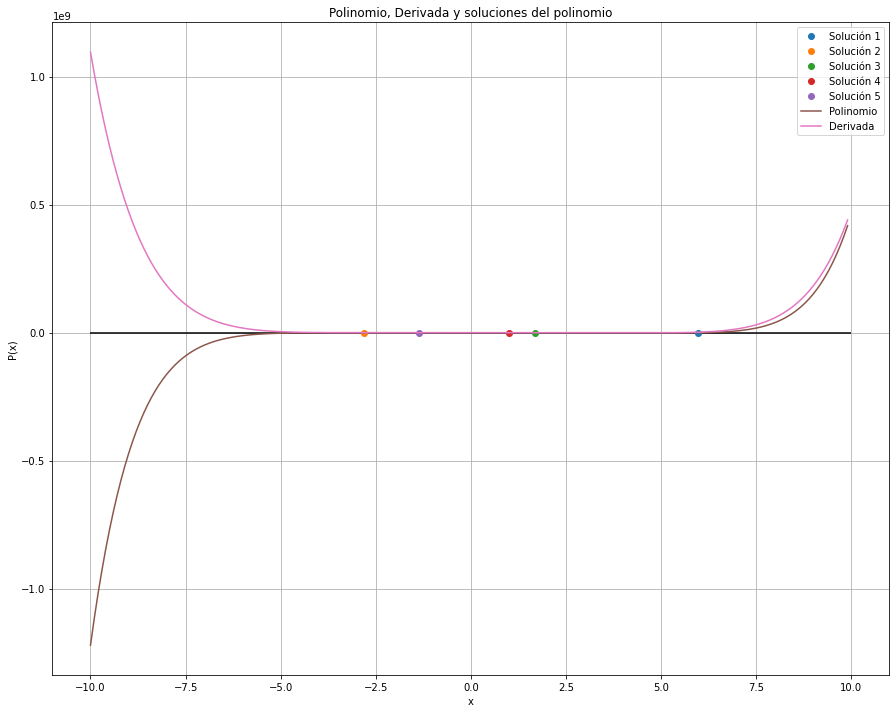

In [49]:
x = np.arange(-10, 10, 0.1)

plt.figure(figsize=(15, 12))
plt.title('Polinomio, Derivada y soluciones del polinomio')

#agregamosamos un epsilon para comparar las partes imaginarias de las raices

eps, j = 1.0e-12, 1 #tolerancia
for i in range(len(sp)):
  if (abs(sp[i].imag) < eps):
    plt.plot(sp[i].real, 0, 'o', label='Solución %d' %(j))
    j += 1

plt.plot(x, p(x), label='Polinomio')
plt.plot(x, p1(x), label='Derivada')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.hlines(0, -10, 10)
plt.legend()
plt.grid()

B)


I) Usando como semilla el número de su cédula, genere de forma aletoria un número entero entre 1 y 5


In [30]:
np.random.seed(1007694473)
np.random.randint(1,5)

2

II) De acuerdo al entero obtenido, escoja una de las siguientes cinco funciones 
1. $$x\operatorname{e}^x=p\,, $$
2. $$\frac{\sin x}{x}=+p\,,$$
3. $$\frac{\sin x}{x}=-p\,,$$
4. $$\frac{\cos x}{x}=+p\,,$$
5. $$\frac{\cos x}{x}=-p\,,$$
III) Genere un número aleatorio entre 0 y 1 y asignelo al valor de $p$
IV) Encuentre la solución a la ecuación trascendental para el intervalo $x$ entre -10 y 10 y gráfique la correspondiente función trascendental y las correspondientes soluciones. . Se tendrá en cuenta la estética del gráfico presentado incluyendo la rotulación adecuada del mismo.

A modo de nota curiosa: estas ecuaciones trascendentales están asociadas a soluciones de la ecuación de Schödinger en mecánica cuántica: https://doi.org/10.1080/14786435.2015.1081425

In [61]:
p = np.random.rand()
p

0.4792361507969426

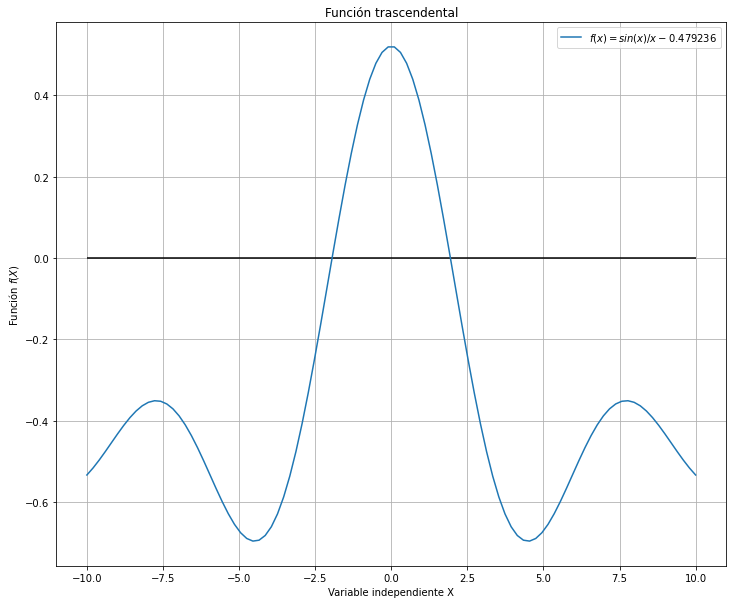

In [97]:
f = lambda x: np.sin(x)/x - p

x = np.linspace(-10, 10, 100)

def grafica():
  plt.figure(figsize=(12, 10))
  plt.title("Función trascendental")
  plt.plot(x, f(x), label='$f(x) = sin(x)/x - %lf$' %p)
  plt.hlines(0, -10, 10)
  plt.xlabel('Variable independiente X')
  plt.ylabel('Función $f(X)$')
  plt.legend()
  plt.grid()

grafica()

In [98]:
r1 = optimize.newton(f, -2, tol=1.0e13)
r2 = optimize.newton(f, 2, tol=1.0e13)

print('Las raíces o soluciones de las función anterior son:')
print('-> x = %lf' %r1)
print('-> x = %lf' %r2)

Las raíces o soluciones de las función anterior son:
-> x = -1.943529
-> x = 1.943529


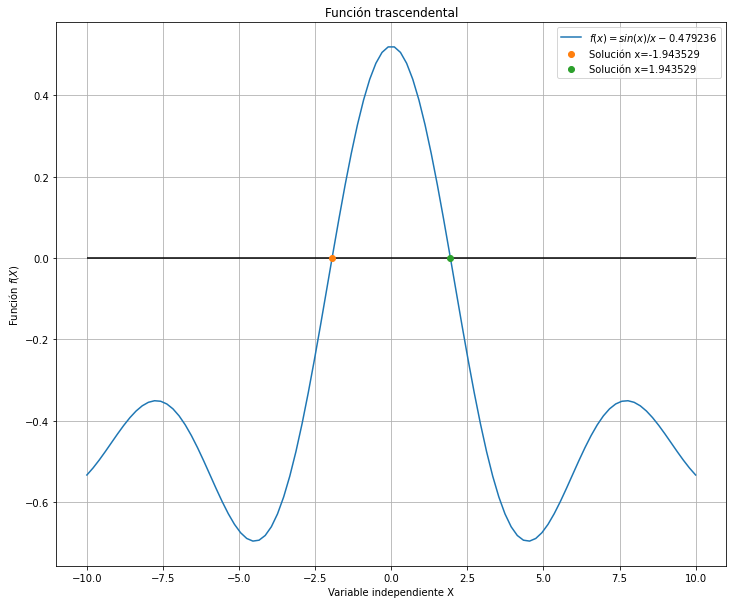

In [99]:
grafica()
plt.plot(r1, 0, 'o', label='Solución x=%lf' %r1)
plt.plot(r2, 0, 'o', label='Solución x=%lf' %r2)
plt.legend()

Yennifer Yuliana Guerrero Uchima cc.1007694473